<a href="https://colab.research.google.com/github/MAboElFottouh/AMIT/blob/main/bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')


In [5]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
# Drop 'duration' column
data.drop('duration',axis=1, inplace= True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [11]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

#encode diagnosis values

In [18]:
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,2]=le.fit_transform(data.iloc[:,2])
data.iloc[:,3]=le.fit_transform(data.iloc[:,3])
data.iloc[:,4]=le.fit_transform(data.iloc[:,4])
data.iloc[:,6]=le.fit_transform(data.iloc[:,6])
data.iloc[:,7]=le.fit_transform(data.iloc[:,7])
data.iloc[:,8]=le.fit_transform(data.iloc[:,8])
data.iloc[:,10]=le.fit_transform(data.iloc[:,10])
data.iloc[:,14]=le.fit_transform(data.iloc[:,14])
data.iloc[:,15]=le.fit_transform(data.iloc[:,15])

In [19]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,2,172,5,0,0


#Check Balancing

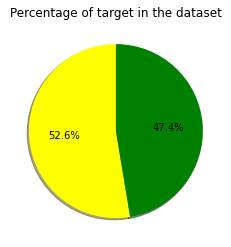

In [113]:
from matplotlib import pyplot as plt
sizes = data['deposit'].value_counts(sort = True)
colors = ["yellow","green"] 
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Percentage of target in the dataset')
plt.show()

In [21]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,63.000000,854.000000,58.000000,3.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


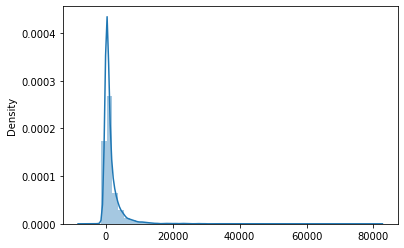

In [22]:
sns.distplot(x=data['balance'])

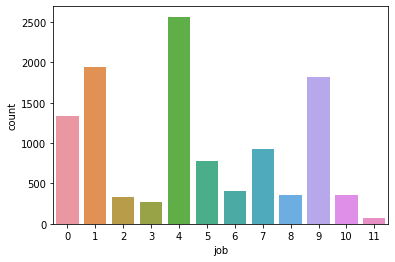

In [27]:
sns.countplot(x='job',data=data)

# Feature Selection

#Correlation


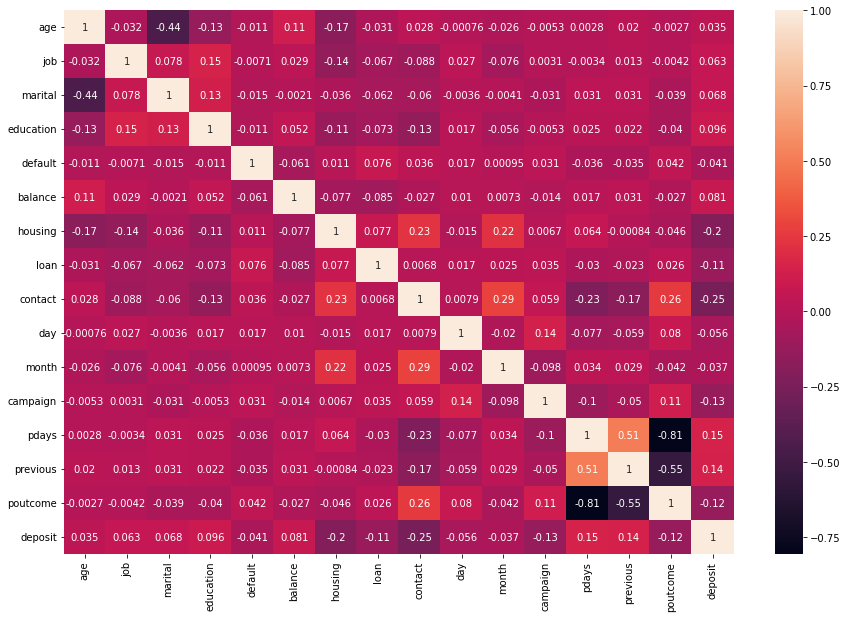

In [30]:
co=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=co,annot=True)

In [72]:
corr=data.corr()
columns=np.full(corr.shape[0],False,dtype=bool)
columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [75]:
for i in range(0,corr.shape[-1]):
    if abs(corr.iloc[i,-1])>0.19:
        columns[i]=True

In [76]:
selected_columns=data.columns[columns]

In [77]:
selected_columns

Index(['housing', 'contact', 'deposit'], dtype='object')

In [78]:
high_features=data[selected_columns]
high_features.head()

,housing,contact,deposit
0,1,2,1
1,0,2,1
2,1,2,1
3,1,2,1
4,0,2,1


In [79]:
data_copy=data.drop(selected_columns,axis=1)

In [80]:
data_copy.head()

,age,job,marital,education,default,balance,loan,day,month,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,0,5,8,1,-1,0,3
1,56,0,1,1,0,45,0,5,8,1,-1,0,3
2,41,9,1,1,0,1270,0,5,8,1,-1,0,3
3,55,7,1,1,0,2476,0,5,8,1,-1,0,3
4,54,0,1,2,0,184,0,5,8,2,-1,0,3


In [82]:
X=data_copy.values

# Feature extraction 

In [84]:
from sklearn.preprocessing import Normalizer 
nor=Normalizer()
X=nor.fit_transform(X)

In [85]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_components=pca.fit_transform(X)

In [86]:
variance_eplained=pca.explained_variance_ratio_
comulative_variance=np.cumsum(variance_eplained)

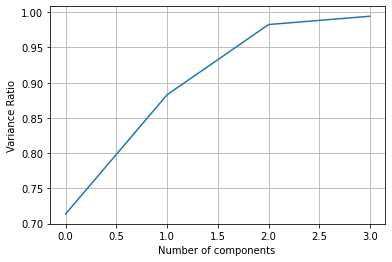

In [87]:
plt.figure(figsize=(6,4))
plt.clf()
plt.plot(comulative_variance)
plt.xlabel('Number of components ')
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()

In [88]:
pca.explained_variance_ratio_

array([0.71373849, 0.16917121, 0.09965659, 0.01177878])

In [89]:
pca_data=pd.DataFrame(data=pca_components)

In [90]:
new_data=pd.concat([high_features,pca_data],axis=1)
new_data.head()

,housing,contact,deposit,0,1,2,3
0,1,2,1,-0.303784,0.012714,0.099602,-0.007355
1,0,2,1,0.292749,-0.431370,-0.233238,-0.232450
2,1,2,1,-0.300802,0.006650,0.094759,-0.008322
3,1,2,1,-0.304679,0.014464,0.101115,-0.006274
4,0,2,1,-0.182002,-0.157624,-0.040255,-0.082962


In [93]:
new_data['target']=new_data['deposit']

In [94]:
new_data.drop('deposit',axis=1, inplace= True)

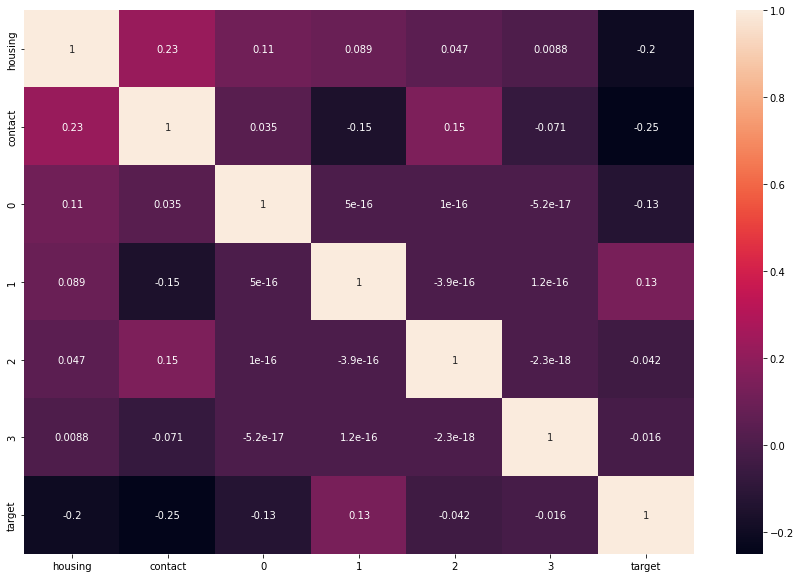

In [97]:
coo=new_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=coo,annot=True)

#Split Data

In [140]:
from sklearn.model_selection import train_test_split
y=new_data.iloc[:,-1].values
X=new_data.iloc[:,:-1].values
train_X,test_X,train_y,test_y = train_test_split(X,y)

## Model 

In [141]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

DT= DecisionTreeClassifier(max_depth=5,min_samples_split=4,min_samples_leaf=3)
                           #,max_features=6)
DT.fit(train_X,train_y)
# Predict classes given the validation features
pred_y_DT = DT.predict(test_X)
pred_y_DT_train = DT.predict(train_X)

# Calculate the accuracy as our performance metric
accuracy_DT = metrics.accuracy_score(test_y, pred_y_DT)
accuracy_DT_train = metrics.accuracy_score(train_y, pred_y_DT_train)

print("Accuracy: ", accuracy_DT)
print("Accuracy: ", accuracy_DT_train)

Accuracy:  0.6463633106413472
Accuracy:  0.6579859037152073


# Evalution 

In [142]:
#On train Set 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
y_pred=DT.predict(train_X)


print("Accuracy :" ,accuracy_score(train_y,y_pred))
print("Recall : ",recall_score(train_y,y_pred))
print("precsiion : ",precision_score(train_y,y_pred))
print("F1 score :",f1_score(train_y,y_pred))

Accuracy : 0.6579859037152073
Recall :  0.6299795709908069
precsiion :  0.6356609121360474
F1 score : 0.6328074900602795


In [145]:
#On test Set 
y_pred=DT.predict(test_X)

print("Accuracy :" ,accuracy_score(test_y,y_pred))
print("Recall : ",recall_score(test_y,y_pred))
print("precsiion : ",precision_score(test_y,y_pred))
print("F1 score :",f1_score(test_y,y_pred))

Accuracy : 0.6463633106413472
Recall :  0.627822286962855
precsiion :  0.6442451420029895
F1 score : 0.6359277019549983
